# 0 NOTEBOOK SETUP

In [1]:
!pip install -q -U keras-tuner

In [8]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
print('TensorFlow Version',tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

TensorFlow Version 2.6.0


# 1 DATA PROCESSING

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


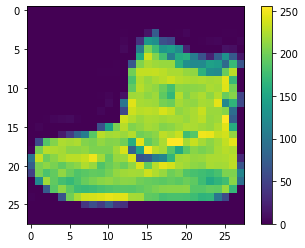

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Images provided in the dataset is need to be preprocessed. As you can see above, the pixel values falls in the range 0 to 255. Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Sanity check!
Now we will verify the pixel range of the images.

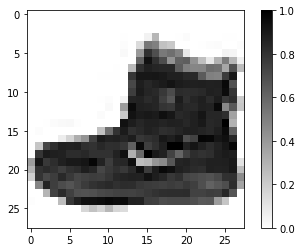

In [20]:
plt.figure()
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()#The pixel range is from 0 to 1

In [23]:
train_images[0].shape

(28, 28)

In [24]:
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)

In [25]:
train_images[0].shape

(28, 28, 1)

In [26]:
def build_model(hp):
  model = keras.Sequential([
      keras.layers.Conv2D(
          filter=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
          kernal_size=hp.Choice('conv_1_kernel', values=[3,5]),
          activation='relu',
          input_shape=(28,28,1)
      ),
      keras.layers.Conv2D(
          filter=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
          kernal_size=hp.Choice('conv_2_kernel', values=[3,5]),
          activation='relu'
      ),
      keraslayers.flatten(),
      keras.layers.Dense(
          units=hp.Int('Dense_1_units', min_value=32,max_value=128, step=16),
          activation='relu',
      ),
      keras.layers.Dense(10,activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2,1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model